# Assignment 3: Convolutional Neural Networks

## DTSC-680: Applied Machine Learning

## Name:

### Overview

The [`CIFAR10` dataset](https://keras.io/api/datasets/cifar10/) contains 50,000 32 $\times$ 32 colored images of the things listed below. 

| Label    | Description |
| -------- | -------|
| 0 | airplane    |
| 1 | automobile     |
| 2 | bird    |
| 3 | cat    |
| 4 | deer    |
| 5 | dog    |
| 6 | frog    |
| 7 | horse    |
| 8 | ship    |
| 9 | truck    |

The `base_model` contains a CNN that was trained on over 17,000 CIFAR10 images, none of which contained a horse, ship, or truck. In this assignment, you will use the bottleneck layers of the `base_model`, along with transfer learning to build a network that can classify all 10 categories of the images in the CIFAR10 dataset.

### Install Tensorflow 2.9.2

In [1]:
# CODE PROVIDED
import subprocess
import sys
from IPython.display import clear_output
def update_libraries():
    tf_desired_version = "2.9.2"

    try:
        import tensorflow as tf
        tf_installed_version = tf.__version__
    except ImportError:
        tf_installed_version = None

    # Update pip to the latest version
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'])
    print("Pip updated!")
    
    #Check for the right version
    if tf_installed_version != tf_desired_version:
        print(f"Current TensorFlow version: {tf_installed_version}. Installing version {tf_desired_version}...")
        
        # Uninstall the current TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', 'tensorflow'])
        
        # Install the desired TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', f'tensorflow=={tf_desired_version}'])

        clear_output()
        print("TensorFlow version {tf_desired_version} installed successfully")
        
    else:
        print(f"TensorFlow version {tf_desired_version} is already installed.")    


    print(f"Please restart your kernel to apply the changes.")
    
update_libraries()

Pip updated!
TensorFlow version 2.9.2 is already installed.
Please restart your kernel to apply the changes.


In [2]:
# common imports
import numpy as np
import pandas as pd

### Data and Model Prep

Load the `base_model` and then run the following cell to load the data.

In [3]:
# STUDENTS CODE
from tensorflow.keras.models import load_model
base_model = load_model('base_model3.h5')

2024-09-20 09:22:53.787924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# CODE PROVIDED -- takes almost 3 minutes to run
x_train = np.loadtxt('data/x_train.txt').reshape(32516, 32, 32, 3)
y_train = np.loadtxt('data/y_train.txt')
x_test = np.loadtxt('data/x_test.txt').reshape(6512, 32, 32, 3)
y_test = np.loadtxt('data/y_test.txt')
print(y_train.shape)
print(y_test.shape)

(32516,)
(6512,)


Let's test the `base_model`. The below code loads and displays a sample image of a ship from the test dataset. Use the `base_model` to make a prediction about the object contained in the sample image.

8.0


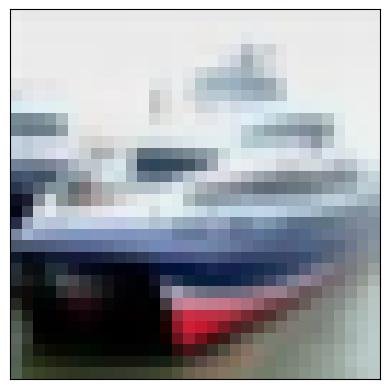

In [5]:
# CODE PROVIDED
%matplotlib inline
import matplotlib.pyplot as plt
x = x_test[0]

print(y_test[0])
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [6]:
# CODE PROVIDED
from tensorflow.keras.preprocessing import image

# preprocess the image
x = image.img_to_array(x_test[0])
x = np.expand_dims(x, axis=0)

# STUDENTS CODE
y = base_model.predict(x)
y

1/1 [==============================] - 0s 296ms/step


array([[1.07818075e-01, 8.92128527e-01, 4.90114835e-05, 3.93905611e-06,
        2.26635095e-07, 1.69193953e-07, 2.22662488e-09]], dtype=float32)

What does the `base_model` predict that the sample image is? Let's use transfer learning to create a domain-specific model that can classify images of horses, ships, and trucks in addition to the rest of the images that the `base_model` was trained on.

The below code extracts the bottleneck layers from the `base_model`.

In [7]:
# CODE PROVIDED
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Resizing
model = Model(inputs = base_model.layers[0].input, outputs = base_model.layers[3].output)

### Transfer Learning

Create the classification layers for transfer learning and train them.

In [8]:
# STUDENTS CODE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
x_train = base_model.predict(x_train)
x_test = base_model.predict(x_test)

204/204 [==============================] - 2s 10ms/step


In [13]:
# STUDENTS CODE
#Running all images for feature extraction
from tensorflow.keras.layers import Dense, Flatten, Conv2D
#Creating classification layers
new_model = Sequential()
new_model.add(Dense(256, activation='relu',input_shape=(7,)))
new_model.add(Dense(10, activation='softmax'))
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# STUDENTS CODE -- takes about 2 minutes to run
hist = new_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=10)

Epoch 1/10
3252/3252 [==============================] - 25s 8ms/step - loss: 1.3005 - accuracy: 0.5038 - val_loss: 1.3070 - val_accuracy: 0.5006
Epoch 2/10
3252/3252 [==============================] - 24s 7ms/step - loss: 1.2989 - accuracy: 0.5034 - val_loss: 1.3143 - val_accuracy: 0.4937
Epoch 3/10
3252/3252 [==============================] - 24s 7ms/step - loss: 1.2974 - accuracy: 0.5051 - val_loss: 1.3128 - val_accuracy: 0.4995
Epoch 4/10
3252/3252 [==============================] - 24s 7ms/step - loss: 1.2955 - accuracy: 0.5053 - val_loss: 1.3087 - val_accuracy: 0.5008
Epoch 5/10
3252/3252 [==============================] - 25s 8ms/step - loss: 1.2935 - accuracy: 0.5083 - val_loss: 1.3034 - val_accuracy: 0.4983
Epoch 6/10
3252/3252 [==============================] - 25s 8ms/step - loss: 1.2917 - accuracy: 0.5070 - val_loss: 1.3094 - val_accuracy: 0.4974
Epoch 7/10
2606/3252 [=======================>......] - ETA: 1:07 - loss: 1.2939 - accuracy: 0.5072

In [ ]:
new_model.output

Plot the training and validation accuracy.

In [ ]:
# STUDENTS CODE
import seaborn as sns

sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Check to ensure the new model correctly classifies the sample image of a ship.

In [ ]:
from tensorflow.keras.preprocessing import image
x = x_test[0]

x = image.img_to_array(x_test[0])
x = np.expand_dims(x, axis=0)

In [ ]:
# STUDENTS CODE
y = base_model.predict(x)
prediction = new_model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

### Export Models for codegrade evaluation

Export Classification and CNN models

In [ ]:

#export your classification model
classification.save('classification_model.h5')

#export your CNN model
model.save('CNN_model.h5')